In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = datasets.load_iris()

In [3]:
X = data.data
Y = data.target

In [4]:
data_pandas = pd.DataFrame(data.data,columns=data.feature_names)

In [5]:
data_pandas.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=320)

Text(0, 0.5, 'Accuracy')

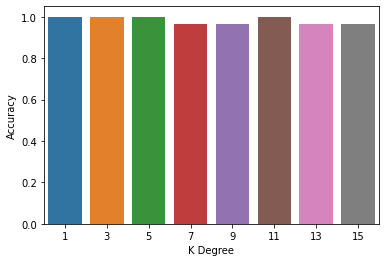

In [7]:
accuracy = {}
for i in range(1,16,2):
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1,weights="uniform")
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    accuracy[i] = metrics.accuracy_score(y_test,y_pred)
sns.barplot(x=list(accuracy.keys()),y=list(accuracy.values())) 
plt.xlabel("K Degree")
plt.ylabel("Accuracy")

In [8]:
accuracy

{1: 1.0,
 3: 1.0,
 5: 1.0,
 7: 0.9666666666666667,
 9: 0.9666666666666667,
 11: 1.0,
 13: 0.9666666666666667,
 15: 0.9666666666666667}

### Scaling

In [9]:
SS = MinMaxScaler()
X = SS.fit_transform(X)

In [10]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=321)

Text(0, 0.5, 'Accuracy')

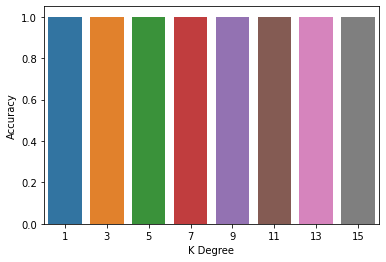

In [11]:
accuracy = {}
for i in range(1,16,2):
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1,weights="distance")
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    accuracy[i] = metrics.accuracy_score(y_test,y_pred)
sns.barplot(x=list(accuracy.keys()),y=list(accuracy.values()))
plt.xlabel("K Degree")
plt.ylabel("Accuracy")

In [12]:
accuracy

{1: 1.0, 3: 1.0, 5: 1.0, 7: 1.0, 9: 1.0, 11: 1.0, 13: 1.0, 15: 1.0}

In [13]:
metrics.confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]], dtype=int64)

c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


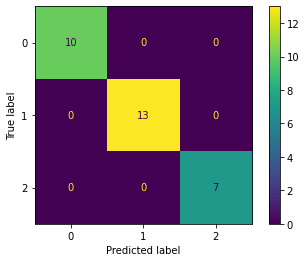

In [14]:
metrics.plot_confusion_matrix(knn,x_test,y_test)